2-arms test

{
    "model_name": "bootstrapped_ucb.2023.05.15.17.14.24",
    "path": "/home/lorenzo/Desktop/mimic-2/log/mab/trace/att.lte.driving.2016.bootstrapped_ucb.2023.05.16.19.13.16.csv",
    "timestamp": "2023.05.16.19.13.16",
    "trace_name": "att.lte.driving.2016.bootstrapped_ucb.2023.05.16.19.13.16.csv"
},
{
    "model_name": "bootstrapped_ucb.2023.05.15.21.45.42",
    "path": "/home/lorenzo/Desktop/mimic-2/log/mab/trace/tm.lte.driving.bootstrapped_ucb.2023.05.17.11.48.42.csv",
    "timestamp": "2023.05.17.11.48.42",
    "trace_name": "tm.lte.driving.bootstrapped_ucb.2023.05.17.11.48.42.csv"
},
{
    "model_name": "bootstrapped_ucb.2023.05.16.04.52.08",
    "path": "/home/lorenzo/Desktop/mimic-2/log/mab/trace/vz.lte.driving.bootstrapped_ucb.2023.05.17.11.52.09.csv",
    "timestamp": "2023.05.17.11.52.09",
    "trace_name": "vz.lte.driving.bootstrapped_ucb.2023.05.17.11.52.09.csv"
},


3-arms test

{
    "model_name": "bootstrapped_ucb.2023.05.16.09.41.01",
    "path": "/home/lorenzo/Desktop/mimic-2/log/mab/trace/att.lte.driving.2016.bootstrapped_ucb.2023.05.17.12.16.00.csv",
    "timestamp": "2023.05.17.12.16.00",
    "trace_name": "att.lte.driving.2016.bootstrapped_ucb.2023.05.17.12.16.00.csv"
},
{
    "model_name": "bootstrapped_ucb.2023.05.16.11.28.01",
    "path": "/home/lorenzo/Desktop/mimic-2/log/mab/trace/tm.lte.driving.bootstrapped_ucb.2023.05.17.12.19.33.csv",
    "timestamp": "2023.05.17.12.19.33",
    "trace_name": "tm.lte.driving.bootstrapped_ucb.2023.05.17.12.19.33.csv"
},
{
    "model_name": "bootstrapped_ucb.2023.05.16.13.03.08",
    "path": "/home/lorenzo/Desktop/mimic-2/log/mab/trace/vz.lte.driving.bootstrapped_ucb.2023.05.17.12.27.15.csv",
    "timestamp": "2023.05.17.12.27.15",
    "trace_name": "vz.lte.driving.bootstrapped_ucb.2023.05.17.12.27.15.csv"
}

Native protocols

att.lte.driving.2016.cubic.2023.04.22.16.45.52
tm.lte.driving.cubic.2023.04.22.12.35.40
vz.lte.driving.cubic.2023.04.22.12.40.57

att.lte.driving.2016.bbr.2023.04.22.12.47.35
tm.lte.driving.bbr.2023.04.22.12.48.38
vz.lte.driving.bbr.2023.04.22.12.52.55

att.lte.driving.2016.hybla.2023.04.22.12.59.29
tm.lte.driving.hybla.2023.04.22.13.00.40
vz.lte.driving.hybla.2023.04.22.13.05.53

Plot to generate

2-arms vs 3-arms 

mean (or 95-perc) rtt vs throughput
rtt cdf
throughput cdf

(link capacity?)
kernel vs iperf data

In [19]:
import os
import sys
import json
sys.path.insert(0, os.path.abspath(os.path.join('', os.pardir)))
analysis_dir = os.path.abspath(os.path.join('', os.pardir))
sys.path.insert(0, os.path.abspath(os.path.join(analysis_dir, os.pardir)))
from utils.misc import read_json_file
from src.ml.helper.utils import parse_traces_config
import matplotlib.pyplot as plt

In [20]:
iperf_path = "/home/lorenzo/Desktop/mimic-2/log/iperf"

#  Iperf traces
i_json_2_arms = {
    "att.lte.driving.2016": "att.lte.driving.2016.bootstrapped_ucb.2023.05.17.15.35.04.json",
    "tm.lte.driving": "tm.lte.driving.bootstrapped_ucb.2023.05.17.11.48.42.json",
    "vz.lte.driving": "vz.lte.driving.bootstrapped_ucb.2023.05.17.11.52.09.json"
}

i_json_3_arms = {
    "att.lte.driving.2016": "att.lte.driving.2016.bootstrapped_ucb.2023.05.17.12.16.00.json",
    "tm.lte.driving": "tm.lte.driving.bootstrapped_ucb.2023.05.17.12.19.33.json",
    "vz.lte.driving": "vz.lte.driving.bootstrapped_ucb.2023.05.17.12.27.15.json"
}

i_json_4_arms = {
    "att.lte.driving.2016": "att.lte.driving.2016.bootstrapped_ucb.2023.05.18.11.35.31.json",
    "tm.lte.driving": "tm.lte.driving.bootstrapped_ucb.2023.05.18.11.38.14.json",
    "vz.lte.driving": "vz.lte.driving.bootstrapped_ucb.2023.05.18.11.43.11.json"
}

i_json_5_arms = {
    "att.lte.driving.2016": "att.lte.driving.2016.bootstrapped_ucb.2023.05.22.00.04.03.json",
    "tm.lte.driving": "tm.lte.driving.bootstrapped_ucb.2023.05.22.00.05.15.json",
    "vz.lte.driving": "vz.lte.driving.bootstrapped_ucb.2023.05.22.00.06.19.json"
}

In [21]:
# # Kernel metrics

# history_path = "/home/lorenzo/Desktop/mimic-2/log/mab/history"

# k_json_2_arms = {
#     "att.lte.driving.2016": "bootstrapped_ucb.2023.05.15.17.14.24.2023.05.16.19.13.16.json",
#     "tm.lte.driving": "bootstrapped_ucb.2023.05.15.21.45.42.2023.05.17.11.48.42.json",
#     "vz.lte.driving": "bootstrapped_ucb.2023.05.16.04.52.08.2023.05.17.11.52.09.json"
# }

# k_json_3_arms = {
#     "att.lte.driving.2016": "bootstrapped_ucb.2023.05.16.09.41.01.2023.05.17.12.16.00.json",
#     "tm.lte.driving": "bootstrapped_ucb.2023.05.16.11.28.01.2023.05.17.12.19.33.json",
#     "vz.lte.driving": "bootstrapped_ucb.2023.05.16.13.03.08.2023.05.17.12.27.15.json"
# }

In [22]:
# # Single protocol kernel metrics

# cubic_json = {
#     "att.lte.driving.2016": "test_cubic.2023.04.22.16.45.52.json",
#     "tm.lte.driving": "test_cubic.2023.04.22.12.35.40.json",
#     "vz.lte.driving": "test_cubic.2023.04.22.12.40.57.json"
# }

# bbr_json = {
#     "att.lte.driving.2016": "test_bbr.2023.04.22.12.47.35.json",
#     "tm.lte.driving": "test_bbr.2023.04.22.12.48.38.json",
#     "vz.lte.driving": "test_bbr.2023.04.22.12.52.55.json"
# }

# hybla_json = {
#     "att.lte.driving.2016": "test_hybla.2023.04.22.12.59.29.json",
#     "tm.lte.driving": "test_hybla.2023.04.22.13.00.40.json",
#     "vz.lte.driving": "test_hybla.2023.04.22.13.05.53.json"
# }

In [23]:
# Single protocol iperf metrics

i_cubic_json = {
    "att.lte.driving.2016": "att.lte.driving.2016.cubic.2023.04.22.18.09.38.json",
    "tm.lte.driving": "tm.lte.driving.cubic.2023.04.22.12.35.40.json",
    "vz.lte.driving": "vz.lte.driving.cubic.2023.04.22.12.40.57.json"
}

i_bbr_json = {
    "att.lte.driving.2016": "att.lte.driving.2016.bbr.2023.04.22.12.47.35.json",
    "tm.lte.driving": "tm.lte.driving.bbr.2023.04.22.12.48.38.json",
    "vz.lte.driving": "vz.lte.driving.bbr.2023.04.22.12.52.55.json"
}

i_hybla_json = {
    "att.lte.driving.2016": "att.lte.driving.2016.hybla.2023.04.22.12.59.29.json",
    "tm.lte.driving": "tm.lte.driving.hybla.2023.04.22.13.00.40.json",
    "vz.lte.driving": "vz.lte.driving.hybla.2023.04.22.13.05.53.json"
}

i_vegas_json = {
    "att.lte.driving.2016": "att.lte.driving.2016.vegas.2023.05.18.12.13.10.json",
    "tm.lte.driving": "tm.lte.driving.vegas.2023.05.18.12.14.22.json",
    "vz.lte.driving": "vz.lte.driving.vegas.2023.05.18.12.20.13.json"
}

i_pcc_json = {
    "att.lte.driving.2016": "att.lte.driving.2016pcc.2023.05.22.08.43.47",
    "tm.lte.driving": "tm.lte.driving.pcc.2023.05.22.08.44.58", 
    "vz.lte.driving": "vz.lte.driving.pcc.2023.05.22.08.50.11"
}

In [24]:
def build_features_per_step(json_obj):
    step_array = {}

    for i, step_logs in enumerate(json_obj):
        step_array[i] = []
        for features_vector in step_logs["observation"]["features"]:
            step_array[i].append(features_vector)
    return step_array

def get_features(feature_vector):
    cwnd_values = []
    rtt_values = []
    thr_values = []
    for step in feature_vector.keys():
        for batch in feature_vector[step]:
            cwnd_values.append(batch[0])
            rtt_values.append(batch[1])
            thr_values.append(batch[8])
    return cwnd_values, rtt_values, thr_values

In [25]:
import numpy as np

traces = ["att.lte.driving.2016", "tm.lte.driving", "vz.lte.driving"]
model = "bootstrapped_ucb"
# k_json_dict_2 = {}
# k_json_dict_3 = {}
i_json_dict_2 = {}
i_json_dict_3 = {}
i_json_dict_4 = {}
i_json_dict_5 = {}
# single_prot_dict = {}
i_single_prot_dict = {}

for t in traces:
    i_json_dict_2[t] = read_json_file(os.path.join(iperf_path, i_json_2_arms[t]))
    i_json_dict_3[t] = read_json_file(os.path.join(iperf_path, i_json_3_arms[t]))
    i_json_dict_4[t] = read_json_file(os.path.join(iperf_path, i_json_4_arms[t]))
    i_json_dict_5[t] = read_json_file(os.path.join(iperf_path, i_json_5_arms[t]))
    
# for t in traces:
#     k_json_dict_2[t] = []
#     with open(os.path.join(history_path, k_json_2_arms[t]), 'r') as f1:
#         for line in f1:
#             k_json_dict_2[t].append(json.loads(line))

#     k_json_dict_3[t] = []
#     with open(os.path.join(history_path, k_json_3_arms[t]), 'r') as f2:
#         for line in f2:
#             k_json_dict_3[t].append(json.loads(line))

#  for kernel
# for p in ["cubic", "bbr", "hybla"]:
#     if p == "cubic":
#         p_json = cubic_json
#     elif p == "bbr":
#         p_json = bbr_json
#     else:
#         p_json = hybla_json
#     for t in traces:
#         single_prot_dict[(p, t)] = []
#         with open(os.path.join(history_path, p_json[t]), 'r') as f3:
#             for line in f3:
#                 single_prot_dict[(p,t)].append(json.loads(line)) 

# for iperf
for p in ["cubic", "bbr", "hybla", "vegas", "pcc"]:
    if p == "cubic":
        p_json = i_cubic_json
    elif p == "bbr":
        p_json = i_bbr_json
    elif p == "hybla":
        p_json = i_hybla_json
    elif p == "vegas":
        p_json = i_vegas_json
    for t in traces:
        i_single_prot_dict[(p, t)] = read_json_file(os.path.join(iperf_path, p_json[t]))

METRICS FROM KERNEL

In [26]:
# import numpy as np

# # Get the features batch for each step
# save = False
# for t in traces:
#     # Plot native

#     for p in ["cubic", "bbr", "hybla"]:
#         s_arr_p = build_features_per_step(single_prot_dict[(p, t)])
#         cwnd_values, rtt_values, thr_values = get_features(s_arr_p)
#         # delay_95_perc = sum(rtt_values)/len(rtt_values)
#         delay_95_perc_p = np.percentile(rtt_values, 95)
#         avg_thr_p = sum(thr_values)/len(thr_values)
#         print(delay_95_perc_p, avg_thr_p)
#         plt.plot(delay_95_perc_p, avg_thr_p, marker='X', label=p)

#     # Plot mimic different arms
#     for n_arms in [2, 3]:
        
#         if n_arms == 2:
#             k_dict = k_json_dict_2
#         elif n_arms == 3:
#             k_dict = k_json_dict_3

#         s_arr = build_features_per_step(k_dict[t])
#         cwnd_values, rtt_values, thr_values = get_features(s_arr)
#         # delay_95_perc = sum(rtt_values)/len(rtt_values)
#         delay_95_perc = np.percentile(rtt_values, 95)
#         # avg_thr = sum(thr_values)/len(thr_values)
#         thr_95_perc = np.percentile(thr_values, 95)
#         print(delay_95_perc, thr_95_perc)

#         plt.plot(delay_95_perc, thr_95_perc, marker='X', label=f"{n_arms} arms")

#     plt.title(t)
#     plt.xlabel('95-percentile Delay (ms)')
#     plt.ylabel('Throughput')
#     plt.grid(linestyle='--', linewidth=0.2)
#     plt.legend()
#     if save:
#         filename = "marginal_gain_rtt_vs_thru.png"
#         plt.savefig(f"/home/lorenzo/Desktop/mimic-2/analysis/plots/thr_trends/{filename}")
#     plt.show()

METRICS FROM IPERF

In [27]:
import yaml

# Open the YAML file
with open('/home/lorenzo/Desktop/mimic-2/analysis/utils/markers.yml', 'r') as file:
    # Load the YAML contentpink
    markers_json = yaml.load(file, Loader=yaml.FullLoader)

In [28]:
# Get native protocols from Pantheon

path_to_results = "/home/lorenzo/Desktop/pantheon/results"
pantheon_dict = {}
pantheon_p_list = []

for p in markers_json["schemes"].keys():
    if not(p.startswith("mimic")):
        print(p)
        pantheon_p_list.append(p)

p_tput_dict = {}
p_delay_dict = {}
for t in traces:
    p_json = read_json_file(os.path.join(path_to_results, t, "pantheon_perf.json"))
    for p in p_json.keys():
        if p_json[p]:
            p_tput_dict[(p, t)] = p_json[p]['1']['1']['tput']
            p_delay_dict[(p, t)] = p_json[p]['1']['1']['delay']

cubic
vegas
bbr
ledbat
pcc
verus
sprout
quic
scream
webrtc
copa
taova
vivace
pcc_experimental
fillp
indigo
fillp_sheep
hybla


In [29]:
def get_metrics(config):
    rtts = []
    cwnds = [] 
    s_rate = []
    for intervals in config['intervals']:
        s_rate.append(intervals['streams'][0]['bits_per_second']*10**(-6))
        cwnds.append(intervals['streams'][0]['snd_cwnd'])
        rtts.append(intervals['streams'][0]['rtt']*10**(-3))
    thruput = config["end"]["streams"][0]["receiver"]["bits_per_second"]*10**(-6)
    return thruput, rtts, cwnds, s_rate

In [30]:
import yaml

# Open the YAML file
with open('/home/lorenzo/Desktop/mimic-2/analysis/utils/markers.yml', 'r') as file:
    # Load the YAML contentpink
    markers_json = yaml.load(file, Loader=yaml.FullLoader)

In [31]:
SMALL_SIZE=8
MEDIUM_SIZE=12
BIGGER_SIZE=20

In [32]:
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"

391.61077499999976 1.742171578923
3640.275474999998 1.8041340949359999
660.7743749999998 1.7280560971949999
10410.085174999998 2.0429922074299998


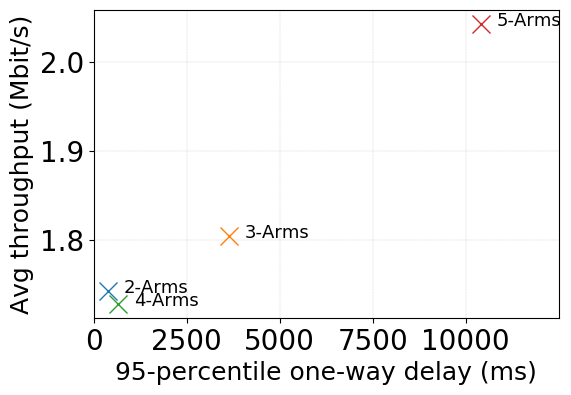

163.18237499999992 25.1514475016
340.2682499999998 26.157358330648
306.26732499999997 25.665063098178
447.455625 24.536007005763


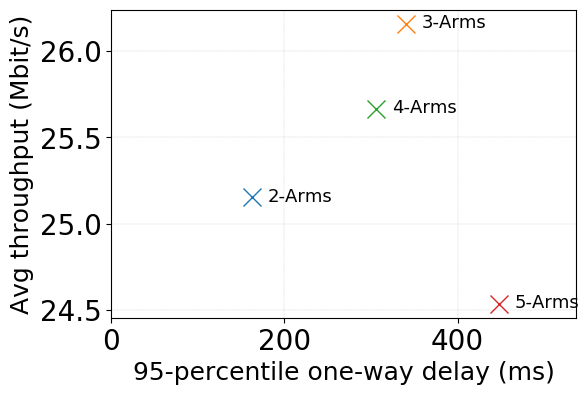

475.43922499999996 7.083746858966
911.394625 7.1462363018329995
1052.9392499999997 7.130183908569999
2154.762625 7.362109136149


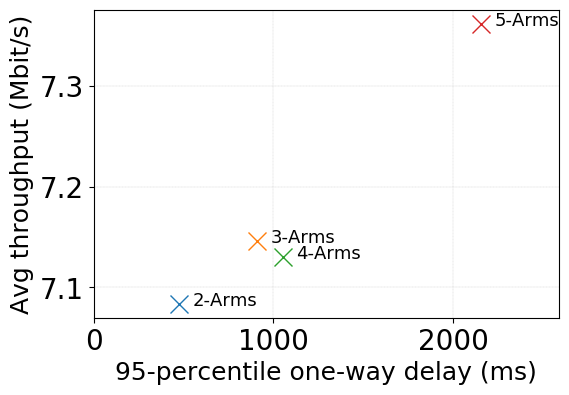

In [38]:
import numpy as np
from matplotlib import markers

all_traces = parse_traces_config()
all_traces = [t for t in all_traces['traces'].keys()]
markers = markers_json["schemes"]

# Get the features batch for each step
save = True
for n_t, t in enumerate(traces):
    plt.figure(figsize=(6,4))
    # Plot native
    # for p in ["hybla", "vegas", "pcc", "cubic", "bbr"]:
    #     thruput, rtts, cwnds, _ = get_metrics(i_single_prot_dict[(p, t)])
    #     # thr_95_perc = np.mean(thruputs)
    #     delay_95_perc = np.percentile(rtts, 95)/2
    #     print(delay_95_perc, thruput)
    #     plt.plot(delay_95_perc, thruput, marker=markers[p]["marker"], 
    #              label=markers[p]["name"], color=markers[p]["color"], 
    #              markersize=9, linestyle="None")
    #     plt.text(delay_95_perc, thruput+.02, markers[p]["name"],
    #               fontsize=9, rotation=30)


    # Get Cubic and BBR from Pantheon
    cubic_tput = p_tput_dict[("cubic", t)]
    cubic_delay = p_delay_dict[("cubic", t)]
    bbr_tput = p_tput_dict[("bbr", t)]
    bbr_delay = p_delay_dict[("bbr", t)]
    pcc_tput = p_tput_dict[("pcc", t)]
    pcc_delay = p_delay_dict[("pcc", t)]
    # plt.plot(cubic_delay, cubic_tput, marker=markers["cubic"]["marker"], label=markers["cubic"]["name"], color=markers["cubic"]["color"], markersize=10)
    # plt.plot(bbr_delay, bbr_tput, marker=markers["bbr"]["marker"], label=markers["bbr"]["name"], color=markers["bbr"]["color"], markersize=10)
    # plt.plot(pcc_delay, pcc_tput, marker=markers["pcc"]["marker"], label=markers["pcc"]["name"], color=markers["pcc"]["color"], markersize=10)

    # Plot mimic different arms
    maxtput, rtts, _, _ = get_metrics(i_json_dict_5[t])
        # thr_95_perc = np.mean(thruputs)
    maxdelay = np.percentile(rtts, 95)/2
        
    for n_arms in [2, 3, 4, 5]:
        if n_arms == 2:
            i_dict = i_json_dict_2
        elif n_arms == 3:
            i_dict = i_json_dict_3
        elif n_arms == 4:
            i_dict = i_json_dict_4
        elif n_arms == 5:
            i_dict = i_json_dict_5

        thruput, rtts, cwnds, _ = get_metrics(i_dict[t])
        # thr_95_perc = np.mean(thruputs)
        delay_95_perc = np.percentile(rtts, 95)/2
        print(delay_95_perc, thruput)
        plt.plot(delay_95_perc, thruput, marker='x', 
                 label=markers[f"mimic-{n_arms}-arms"]["name"],
                 markersize=13, linestyle="None")
        if n_t == 0:
            x_pt = 0.04*maxdelay
            y_pt = 1e-3*maxtput
        elif n_t == 1:
            x_pt = 0.04*maxdelay
            y_pt = 1e-3*maxtput
        else:
            x_pt = 10*maxtput
            y_pt = 1e-6*maxdelay
        
        plt.text(delay_95_perc+x_pt, thruput-y_pt, markers[f"mimic-{n_arms}-arms"]["name"],
                  fontsize=13, rotation=0)
        plt.xlim(0, maxdelay+0.2*maxdelay)

        # plt.title(t)
        # plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
        # plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
        # plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
        plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
        plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
        # plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
        # plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    plt.xlabel('95-percentile one-way delay (ms)', fontsize=18, fontname='Times New Roman')
    plt.ylabel('Avg throughput (Mbit/s)', fontsize=18, fontname='Times New Roman')
    plt.grid(linestyle='--', linewidth=0.2)
    # lgd=plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.14),
        #   ncol=2, fancybox=True, shadow=True, fontsize=14)
    if save:
        filename = f"bootstrapped_ucb.{t}.w_native_protocols.png"
        path = "/home/lorenzo/Desktop/mimic-2/analysis/plots/marginal_gains/"
        os.makedirs(path, exist_ok=True)
        # plt.savefig(os.path.join(path, f"{filename}"), bbox_extra_artists=(lgd,), bbox_inches='tight')
        # plt.savefig(os.path.join(path, f"{filename}"), bbox_inches='tight')
    plt.show()

In [16]:
def cdf(x):
    N = len(x)

    # sort the data in ascending order
    x = np.sort(x)
    
    # get the cdf values of y
    y = np.arange(N) / float(N)

    return (x, y)

In [17]:
FIGSIZE_X = 5
FIGSIZE_Y = 5
X_LABEL_SIZE = 22
Y_LABEL_SIZE = 22
X_TICKS_SIZE = 20
Y_TICKS_SIZE = 20
LEGEND_SIZE = 22
LINEWIDTH = 2.5

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


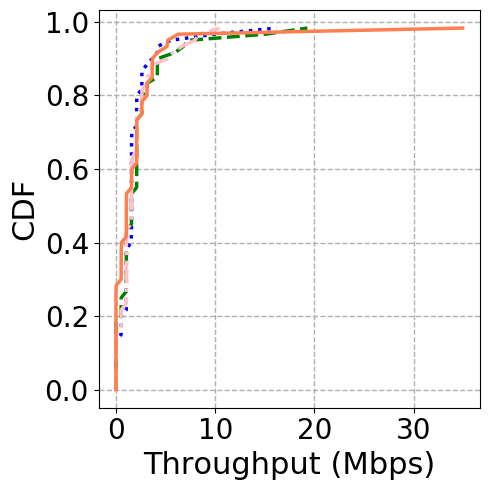

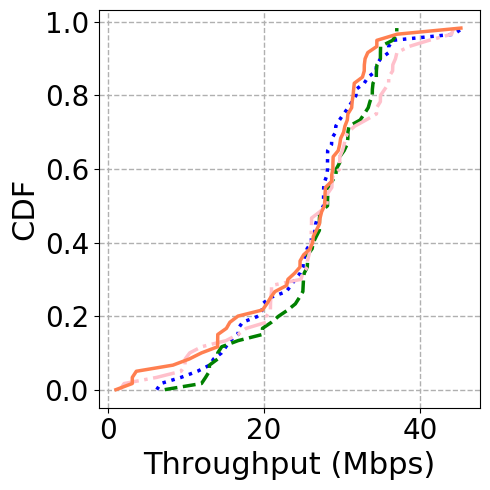

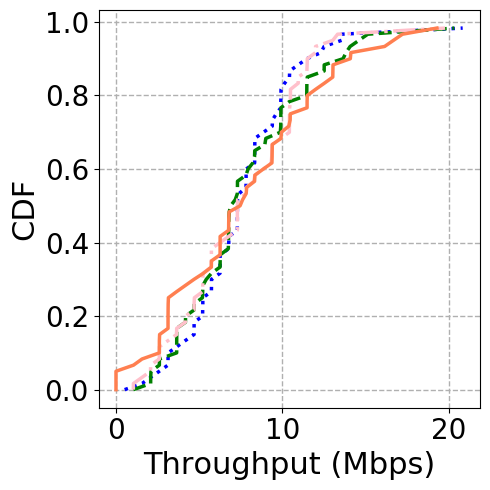

In [18]:
# CDFS
protocols = ["cubic", "bbr", "hybla", "vegas", "pcc"]
linestyle = ["dotted", "dashed", "dashdot", "solid"]
save = True
for t in traces:
    plt.figure(figsize=(FIGSIZE_X,FIGSIZE_Y))
    # for p in protocols:
    #     thruput, rtts, cwnds, s_rate = get_metrics(i_single_prot_dict[p, t])
    #     (t_x, t_y) = cdf(s_rate)
    #     (r_x, r_y) = cdf(rtts)
    #     (c_x, c_y) = cdf(cwnds)
    #     plt.plot(t_x, t_y, label=markers[p]["name"], linewidth=0.8, linestyle="dotted")

    # plt.subplot(1, 3, 1)
    
    # Plot mimic different arms
    for i, n_arms in enumerate([2, 3, 4, 5]):
        if n_arms == 2:
            i_dict = i_json_dict_2
        elif n_arms == 3:
            i_dict = i_json_dict_3
        elif n_arms == 4:
            i_dict = i_json_dict_4
        elif n_arms == 5:
            i_dict = i_json_dict_5

        thruput, rtts, cwnds, s_rate = get_metrics(i_dict[t])
        (t_x_2, t_y_2) = cdf(s_rate)
        (r_x_2, r_y_2) = cdf(rtts)
        (c_x_2, c_y_2) = cdf(cwnds)

        plt.plot(t_x_2, t_y_2, label=markers[f"mimic-{n_arms}-arms"]["name"],
                  linewidth=LINEWIDTH, color=markers[f"mimic-{n_arms}-arms"]["color"],
                  linestyle=linestyle[i])
        
        # plt.subplot(1, 3, 2)
        # plt.plot(r_x, r_y, label=p)
        # plt.xlabel('RTT (ms)')
        # plt.ylabel('CDF')
        # plt.title(t)
        # plt.legend()
      
        # plt.subplot(1, 3, 3)
        # plt.plot(c_x, c_y, label=p)
        # plt.xlabel('Cwnd (Byte)')
        # plt.ylabel('CDF')
        # plt.title(t)
        # plt.legend()

    # plt.title(t)
    # Show the plot
    plt.xlabel('Throughput (Mbps)', fontsize=X_LABEL_SIZE)
    plt.ylabel('CDF', fontsize=Y_LABEL_SIZE)
    # plt.title(t)
    # plt.legend(fontsize=LEGEND_SIZE)
    # lgd=plt.legend(loc='center right',bbox_to_anchor=(1.2, 0.3),
    #       ncol=1, fancybox=True, shadow=True, fontsize=14)
    plt.grid(linestyle='--', linewidth=1)

    # plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
    # plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    # plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=X_TICKS_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=Y_TICKS_SIZE)    # fontsize of the tick labels
    # plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
    # plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

    plt.tight_layout()

    if save:
        filename = f"bootstrapped_ucb.{t}.thruput_cdf.png"
        path = "/home/lorenzo/Desktop/mimic-2/analysis/plots/marginal_gains/"
        os.makedirs(path, exist_ok=True)
        plt.savefig(os.path.join(path, f"{filename}"))
    plt.show()


In [21]:
# CDFS
import matplotlib
# plt.style.use('seaborn') # I personally prefer seaborn for the graph style, but you may choose whichever you want.

protocols = ["cubic", "bbr", "hybla", "vegas", "pcc"]
linestyle = ["dotted", "dashed", "dashdot", "solid"]
save = True
for t in traces:
    plt.figure(figsize=(FIGSIZE_X,FIGSIZE_Y))
    # for p in protocols:
    #     thruput, rtts, cwnds, s_rate = get_metrics(i_single_prot_dict[p, t])
    #     # (t_x, t_y) = cdf(s_rate)
    #     (r_x, r_y) = cdf(rtts)
    #     # (c_x, c_y) = cdf(cwnds)
    #     plt.plot(r_x, r_y, label=markers[p]["name"], linewidth=0.8, linestyle="dotted")

    # plt.subplot(1, 3, 1)
    
    # Plot mimic different arms
    for i, n_arms in enumerate([2, 3, 4, 5]):
        if n_arms == 2:
            i_dict = i_json_dict_2
        elif n_arms == 3:
            i_dict = i_json_dict_3
        elif n_arms == 4:
            i_dict = i_json_dict_4
        elif n_arms == 5:
            i_dict = i_json_dict_5

        thruput, rtts, cwnds, s_rate = get_metrics(i_dict[t])
        # (t_x_2, t_y_2) = cdf(s_rate)
        (r_x_2, r_y_2) = cdf(rtts)
        # (c_x_2, c_y_2) = cdf(cwnds)

        plt.plot(r_x_2, r_y_2, label=markers[f"mimic-{n_arms}-arms"]["name"],
                  linewidth=LINEWIDTH, color=markers[f"mimic-{n_arms}-arms"]["color"],
                  linestyle=linestyle[i])
        
        # plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
        # plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
        # plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
        plt.rc('xtick', labelsize=X_TICKS_SIZE)    # fontsize of the tick labels
        plt.rc('ytick', labelsize=Y_TICKS_SIZE)    # fontsize of the tick labels
        # plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
        # plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
        
        # plt.subplot(1, 3, 2)
        # plt.plot(r_x, r_y, label=p)
        # plt.xlabel('RTT (ms)')
        # plt.ylabel('CDF')
        # plt.title(t)
        # plt.legend()
      
        # plt.subplot(1, 3, 3)
        # plt.plot(c_x, c_y, label=p)
        # plt.xlabel('Cwnd (Byte)')
        # plt.ylabel('CDF')
        # plt.title(t)
        # plt.legend()
      

    # Show the plot
    plt.xlabel('Delay (ms)', fontsize=X_LABEL_SIZE)
    plt.ylabel('CDF', fontsize=Y_LABEL_SIZE)
    # plt.title(t)
    # plt.legend(fontsize=LEGEND_SIZE)
    plt.grid(linestyle='--', linewidth=1)
    if save:
        filename = f"bootstrapped_ucb.{t}.delay_cdf.png"
        path = "/home/lorenzo/Desktop/mimic-2/analysis/plots/marginal_gains/"
        os.makedirs(path, exist_ok=True)
        plt.savefig(os.path.join(path, f"{filename}"))
    plt.show()




RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpzugg41m_ 955456414cfc912b551339c50d75a368.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./955456414cfc912b551339c50d75a368.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 3 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.7 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on tmpzugg41m_/955456414cfc912b551339c50d75a368.log.




Error in callback <function _draw_all_if_interactive at 0x7fd41262e670> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpvt9_c_s4 955456414cfc912b551339c50d75a368.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./955456414cfc912b551339c50d75a368.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 3 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.7 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on tmpvt9_c_s4/955456414cfc912b551339c50d75a368.log.




RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpavl0ntlf 955456414cfc912b551339c50d75a368.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./955456414cfc912b551339c50d75a368.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 3 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.7 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on tmpavl0ntlf/955456414cfc912b551339c50d75a368.log.




<Figure size 500x500 with 1 Axes>

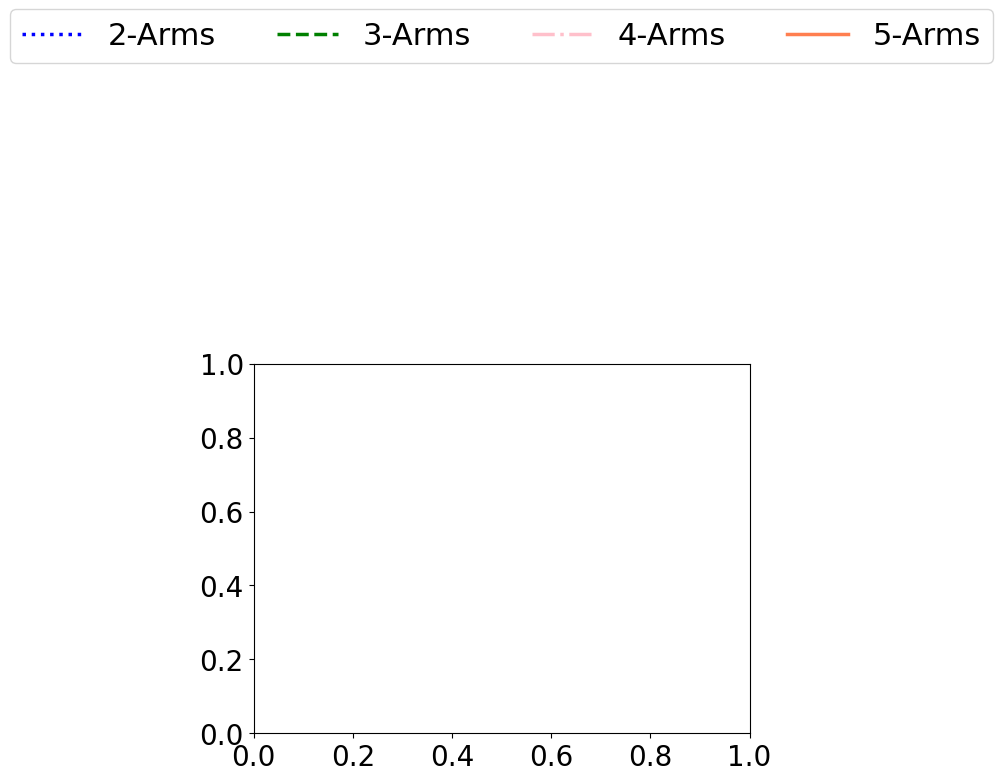

In [45]:
# Create a separate horizontal legend
legend_elements = [plt.Line2D([], [], color=markers[f"mimic-{n_arms}-arms"]["color"],
                                linestyle=linestyle[i], linewidth=LINEWIDTH,
                                label=markers[f"mimic-{n_arms}-arms"]["name"])
                    for i, n_arms in enumerate([2, 3, 4, 5])]

plt.legend(handles=legend_elements, bbox_to_anchor=(0.5, 2), loc='upper center',
            ncol=4, fontsize=LEGEND_SIZE)

In [138]:
# Compute Marginal Gain metrics

import numpy as np
from matplotlib import markers

import numpy as np
from matplotlib import markers

all_traces = parse_traces_config()
all_traces = [t for t in all_traces['traces'].keys()]
markers = markers_json["schemes"]

# Get the features batch for each step
save = True
tput_dict = {}
delay_dict = {}
for n_t, t in enumerate(traces):
    tput_dict[t] = {}
    delay_dict[t] = {}
    print(t,"\n")
    # Plot native
    for p in ["hybla", "vegas", "pcc", "cubic", "bbr"]:
        thruput, rtts, cwnds, _ = get_metrics(i_single_prot_dict[(p, t)])
        delay_95_perc = np.percentile(rtts, 95)/2
        delay_mean = np.mean(rtts)/2
        print(p, delay_mean, thruput)
        tput_dict[t][p] = thruput
        delay_dict[t][p] = delay_mean


    # Get Cubic and BBR from Pantheon
    cubic_tput = p_tput_dict[("cubic", t)]
    cubic_delay = p_delay_dict[("cubic", t)]
    bbr_tput = p_tput_dict[("bbr", t)]
    bbr_delay = p_delay_dict[("bbr", t)]
    pcc_tput = p_tput_dict[("pcc", t)]
    pcc_delay = p_delay_dict[("pcc", t)]
    
    # Plot mimic different arms
    maxtput, rtts, _, _ = get_metrics(i_json_dict_5[t])
        # thr_95_perc = np.mean(thruputs)
        
    for n_arms in [2, 3, 4, 5]:
        if n_arms == 2:
            i_dict = i_json_dict_2
        elif n_arms == 3:
            i_dict = i_json_dict_3
        elif n_arms == 4:
            i_dict = i_json_dict_4
        elif n_arms == 5:
            i_dict = i_json_dict_5

        thruput, rtts, cwnds, _ = get_metrics(i_dict[t])
        # thr_95_perc = np.mean(thruputs)
        delay_mean = np.mean(rtts)/2
        print(f"mutant-{n_arms}", delay_mean, thruput)
        tput_dict[t][f"mutant-{n_arms}"] = thruput
        delay_dict[t][f"mutant-{n_arms}"] = delay_mean

att.lte.driving.2016 

hybla 2862.1691166666665 2.140203802627
vegas 2004.88595 2.0339230248869997
pcc 2004.88595 2.0339230248869997
cubic 2870.952308333334 2.133564481369
bbr 133.89460833333334 1.759766178849
mutant-2 199.94153333333333 1.742171578923
mutant-3 747.7702083333334 1.8041340949359999
mutant-4 284.1803083333333 1.7280560971949999
mutant-5 4846.433108333333 2.0429922074299998
tm.lte.driving 

hybla 392.342425 30.252673428810997
vegas 295.89065000000005 29.839672211633996
pcc 295.89065000000005 29.839672211633996
cubic 298.5892416666666 29.778377858042
bbr 10.78415833333333 23.03897928392
mutant-2 52.05166666666666 25.1514475016
mutant-3 122.87034166666666 26.157358330648
mutant-4 114.90625000000001 25.665063098178
mutant-5 196.25036666666668 24.536007005763
vz.lte.driving 

hybla 1553.844475 7.616630735748
vegas 950.2226083333335 7.515192575671
pcc 950.2226083333335 7.515192575671
cubic 976.5951333333334 7.521605487443
bbr 18.16121666666667 6.951583747867999
mutant-2 119.35

In [139]:
tput_gain = {}
delay_gain = {}
for t in traces:
    tput_gain[t] = {}
    delay_gain[t] = {}
    for p in protocols:
        tput_gain[t][p] = []
        delay_gain[t][p] = []
        for n_arms in [2, 3, 4, 5]:
            tput_gain[t][p].append((tput_dict[t][f"mutant-{n_arms}"] - tput_dict[t][p])/tput_dict[t][p])
            delay_gain[t][p].append((delay_dict[t][p] - delay_dict[t][f"mutant-{n_arms}"])/delay_dict[t][p])

In [140]:
tput_gain

{'att.lte.driving.2016': {'cubic': [-0.18344554657887027,
   -0.15440376389356716,
   -0.19006146180021052,
   -0.04245115379915053],
  'bbr': [-0.009998260074249237,
   0.025212392771418828,
   -0.018019485790288663,
   0.16094526192465397],
  'hybla': [-0.18597865456338047,
   -0.15702696503879227,
   -0.19257404595118846,
   -0.04542165333865756],
  'vegas': [-0.14344271754345714,
   -0.11297818410004304,
   -0.15038274504463764,
   0.004458960556535273],
  'pcc': [-0.14344271754345714,
   -0.11297818410004304,
   -0.15038274504463764,
   0.004458960556535273]},
 'tm.lte.driving': {'cubic': [-0.15537885839515073,
   -0.12159895158345903,
   -0.1381309210149992,
   -0.1760462197528075],
  'bbr': [0.09169105070355231,
   0.13535230915826496,
   0.11398438194225333,
   0.06497804018982072],
  'hybla': [-0.1686206655162207,
   -0.13537035355899624,
   -0.151643137966908,
   -0.18896400797437476],
  'vegas': [-0.1571138140118756,
   -0.12340329527984294,
   -0.1399013060146279,
   -0.177

In [113]:
delay_gain

{'att.lte.driving.2016': {'cubic': {'2-arms': 0.9303570690627722,
   '3-arms': 0.7395393137800208,
   '4-arms': 0.9010153155423513,
   '5-arms': -0.6880925169902316},
  'bbr': {'2-arms': -0.493275463606233,
   '3-arms': -4.584767136192253,
   '4-arms': -1.1224178618593863,
   '5-arms': -35.19587949552113},
  'hybla': {'2-arms': 0.9301433545037379,
   '3-arms': 0.7387400332220061,
   '4-arms': 0.9007115593978965,
   '5-arms': -0.6932727979322115},
  'vegas': {'2-arms': 0.9002728642328341,
   '3-arms': 0.6270260618399099,
   '4-arms': 0.858256122582268,
   '5-arms': -1.4173111235246736},
  'pcc': {'2-arms': 0.9002728642328341,
   '3-arms': 0.6270260618399099,
   '4-arms': 0.858256122582268,
   '5-arms': -1.4173111235246736}},
 'tm.lte.driving': {'cubic': {'2-arms': 0.8256746747601338,
   '3-arms': 0.5884970905822712,
   '4-arms': 0.6151694905060349,
   '5-arms': 0.34274133397695244},
  'bbr': {'2-arms': -3.8266786389603897,
   '3-arms': -10.393595853176615,
   '4-arms': -9.65509671207535

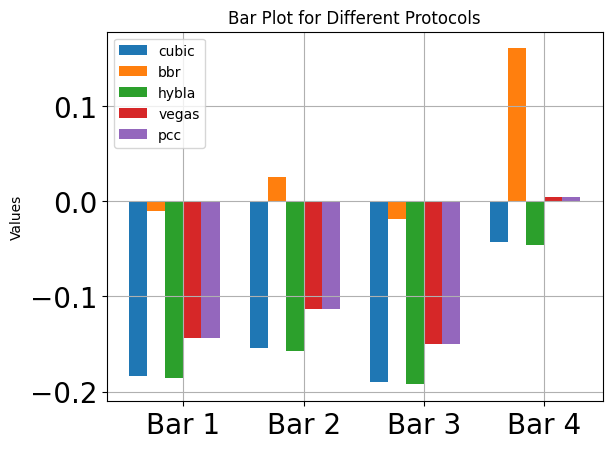

In [150]:
bar_labels = ['Bar 1', 'Bar 2', 'Bar 3', 'Bar 4']
bar_positions = np.arange(len(bar_labels))

# Width of each bar
bar_width = 0.15

# Create the figure and axis
fig, ax = plt.subplots()
for t in traces:
    for i, p in enumerate(protocols):
        # Calculate the x-coordinate for the current protocol's bars
        x = bar_positions + (i * bar_width)
        
        # Plot the bars
        ax.bar(x, tput_gain[t][p], bar_width, label=p)
            
    # Set the x-axis ticks and labels
    ax.set_xticks(bar_positions + (len(protocols) * bar_width) / 2)
    ax.set_xticklabels(bar_labels)

    # Set the y-axis label
    ax.set_ylabel('Values')

    # Set the chart title
    ax.set_title('Bar Plot for Different Protocols')

    # Add a legend
    ax.legend()
    ax.grid()

    # Show the plot
    plt.show()

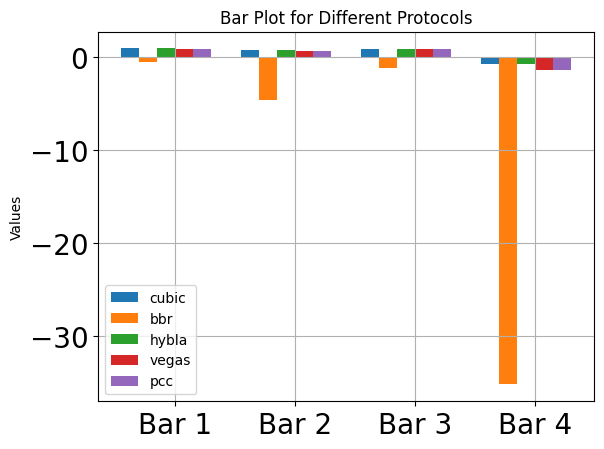

In [151]:
bar_labels = ['Bar 1', 'Bar 2', 'Bar 3', 'Bar 4']
bar_positions = np.arange(len(bar_labels))

# Width of each bar
bar_width = 0.15

# Create the figure and axis
fig, ax = plt.subplots()
for t in traces:
    for i, p in enumerate(protocols):
        # Calculate the x-coordinate for the current protocol's bars
        x = bar_positions + (i * bar_width)
        
        # Plot the bars
        ax.bar(x, delay_gain[t][p], bar_width, label=p)
            
    # Set the x-axis ticks and labels
    ax.set_xticks(bar_positions + (len(protocols) * bar_width) / 2)
    ax.set_xticklabels(bar_labels)

    # Set the y-axis label
    ax.set_ylabel('Values')

    # Set the chart title
    ax.set_title('Bar Plot for Different Protocols')

    # Add a legend
    ax.legend()
    ax.grid()

    # Show the plot
    plt.show()